In [1]:
from IPython.display import HTML
HTML('''
<script>
code_show=false;
function code_toggle(){
    if(code_show){$('.prompt, .input, .output_stderr, .output_error').hide();}
    else{$('.input, .prompt, .output_stderr, .output_error').show();}
    code_show=!code_show;
}
function initialize(){
    document.body.style.fontFamily='Palatino';
    var output=$('.output_subarea.output_text.output_stream.output_stdout');
    $.merge(output,$('.output_subarea.output_text.output_result'));
    for(var i=0;i<output.length;i++)for(var j=0;j<output[i].children.length;j++)
        output[i].children[j].style.fontFamily='Palatino';
    code_toggle();
}
$(document).ready(initialize);
</script>
Click <a href="javascript:code_toggle()">here</a> to show/hide codes in this notebook.
''')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings(action = "ignore")
plt.style.use(["seaborn-bright","dark_background"])

In [3]:
data = pd.read_csv("covid_19_india.csv")
data.head()

Sno        Date     Time State/UnionTerritory ConfirmedIndianNational  \
0  1.0  2020-01-30  6:00 PM               Kerala                       1   
1  2.0  2020-01-31  6:00 PM               Kerala                       1   
2  3.0  2020-02-01  6:00 PM               Kerala                       2   
3  4.0  2020-02-02  6:00 PM               Kerala                       3   
4  5.0  2020-02-03  6:00 PM               Kerala                       3   

  ConfirmedForeignNational  Cured  Deaths  Confirmed  
0                        0    0.0     0.0        1.0  
1                        0    0.0     0.0        1.0  
2                        0    0.0     0.0        2.0  
3                        0    0.0     0.0        3.0  
4                        0    0.0     0.0        3.0

In [4]:
data.isnull().sum()

Sno                         28
Date                        28
Time                        28
State/UnionTerritory        28
ConfirmedIndianNational     28
ConfirmedForeignNational    28
Cured                       28
Deaths                      28
Confirmed                   28
dtype: int64

In [5]:
data.dropna(inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15086 entries, 0 to 15085
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Sno                       15086 non-null  float64
 1   Date                      15086 non-null  object 
 2   Time                      15086 non-null  object 
 3   State/UnionTerritory      15086 non-null  object 
 4   ConfirmedIndianNational   15086 non-null  object 
 5   ConfirmedForeignNational  15086 non-null  object 
 6   Cured                     15086 non-null  float64
 7   Deaths                    15086 non-null  float64
 8   Confirmed                 15086 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.2+ MB


In [7]:
data["Date"] = pd.to_datetime(data["Date"])

In [8]:
data['Month'] = pd.DatetimeIndex(data['Date']).month
data["Year"] = pd.DatetimeIndex(data["Date"]).year

In [9]:
mapping = {1.0:"January",
            2.0:"February",
            3.0:"March",
            4.0:"April",
            5.0:"May",
            6.0:"June",
            7.0:"July",
            8.0:"August",
            9.0:"September",
            10.0:"October",
            11.0:"November",
            12.0:"December"}

In [10]:
data["Month"] = data["Month"].map(mapping)

In [11]:
data["Year"] = data["Year"].astype("int")

In [12]:
data["Cured"] = data["Cured"].astype("int")
data["Deaths"] = data["Deaths"].astype("int")
data["Confirmed"] = data["Confirmed"].astype("int")

In [13]:
states = []
cured = []
deaths = []
confirmed = []
for i in data["State/UnionTerritory"].unique():
    d = data[data["State/UnionTerritory"]==i]
    cur = d["Cured"].sum()
    dea = d["Deaths"].sum()
    conf = d["Confirmed"].sum()
    states.append(i)
    cured.append(cur)
    deaths.append(dea)
    confirmed.append(conf)

In [14]:
new_df = pd.DataFrame()

In [15]:
new_df["States"] = states
new_df["Cured"] = cured
new_df["Deaths"] = deaths
new_df["Confirmed"] = confirmed

In [16]:
new_df.head()

States      Cured   Deaths  Confirmed
0         Kerala  188133411   804737  212938318
1      Telengana   64666267   400427   69990668
2          Delhi  155703040  2868451  166981947
3      Rajasthan   73081348   739930   82839803
4  Uttar Pradesh  151804802  2303128  169782493

In [17]:
dff = new_df.sort_values(by="Confirmed",ascending=False).head(20)
fig = px.bar(dff, x = "States",y = "Confirmed",color = "States",title="Maximum Confirmed Cases")
fig.show()

In [18]:
dff = new_df.sort_values(by="Cured",ascending=False).head(20)
fig = px.bar(dff, x = "States",y = "Cured",color = "States",title="Maximum Cured Patients")
fig.show()

In [19]:
dff = new_df.sort_values(by="Deaths",ascending=False).head(20)
fig = px.bar(dff, x = "States",y = "Deaths",color = "States",title="Maximum Deaths")
fig.show()

In [20]:
dff = new_df.sort_values(by="Confirmed",ascending=False).head(20)
fig = px.pie(dff,names="States",values="Confirmed",color="States",title="Maximum Confirmed Cases Percentage")
fig.show()

In [21]:
new_df["Active"] = new_df["Confirmed"] - (new_df["Cured"]+new_df["Deaths"])
new_df["Death ratio"] = new_df["Deaths"]/new_df["Confirmed"]
new_df["Cured ratio"] = new_df["Cured"]/new_df["Confirmed"]

In [22]:
dff = new_df.sort_values(by="Active",ascending=False).head(20)
fig = px.pie(dff,names="States",values="Active",color="States",title="Active Cases")
fig.show()

In [23]:
dff = new_df.sort_values(by="Death ratio",ascending=False).head(20)
fig = px.bar(dff, x = "States",y = "Death ratio",color = "States",title="Death Ratio")
fig.show()

In [24]:
dff = new_df.sort_values(by="Cured ratio",ascending=False)
fig = px.bar(dff, x = "States",y = "Cured ratio",color = "States",title="Cured Ratio")
fig.show()

In [25]:
state = ["Maharashtra","Karnataka","Andhra Pradesh","Tamil Nadu","Kerala"]

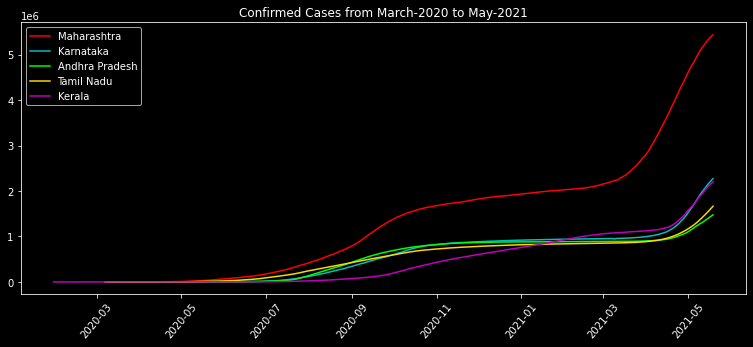

In [26]:
color = ["r","c","lime","gold","m"]
c = 0
plt.figure(figsize=(13,5))
for s in state:
    dff = data[data["State/UnionTerritory"]==s]
    plt.plot(dff["Date"],dff["Confirmed"],color = color[c],linestyle ="-")
    plt.legend(state)
    plt.title("Confirmed Cases from March-2020 to May-2021")
    plt.xticks(rotation=50)
    c = c+1
plt.show()

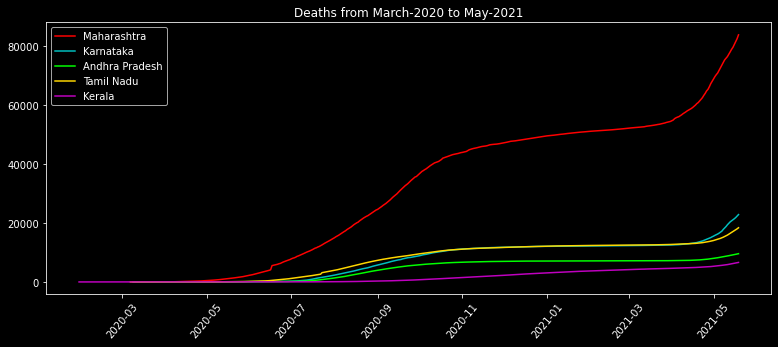

In [27]:
color = ["r","c","lime","gold","m"]
c = 0
plt.figure(figsize=(13,5))
for s in state:
    dff = data[data["State/UnionTerritory"]==s]
    plt.plot(dff["Date"],dff["Deaths"],color = color[c],linestyle ="-")
    plt.legend(state)
    plt.title("Deaths from March-2020 to May-2021")
    plt.xticks(rotation=50)
    c = c+1
plt.show()

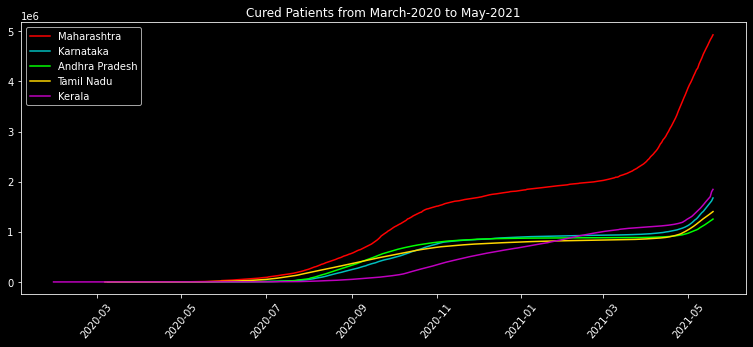

In [28]:
color = ["r","c","lime","gold","m"]
c = 0
plt.figure(figsize=(13,5))
for s in state:
    dff = data[data["State/UnionTerritory"]==s]
    plt.plot(dff["Date"],dff["Cured"],color = color[c],linestyle ="-")
    plt.legend(state)
    plt.title("Cured Patients from March-2020 to May-2021")
    plt.xticks(rotation=50)
    c = c+1
plt.show()

### Comparision of Death, Cured and Confirmed Cases from March-2020 to May-2021

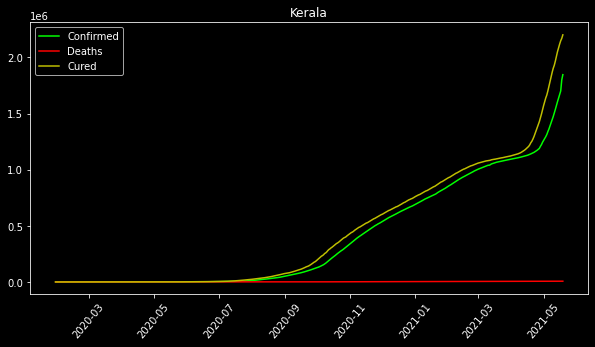

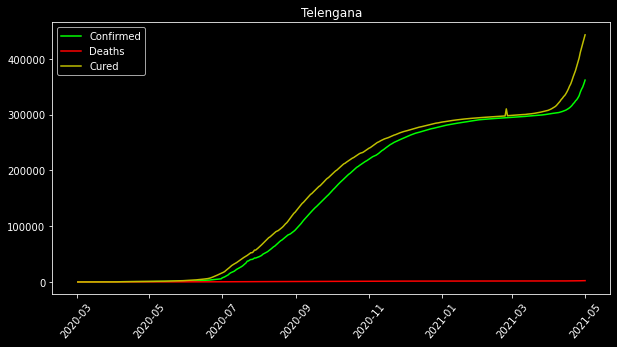

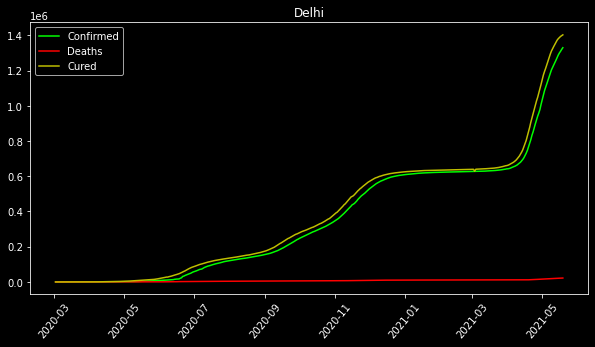

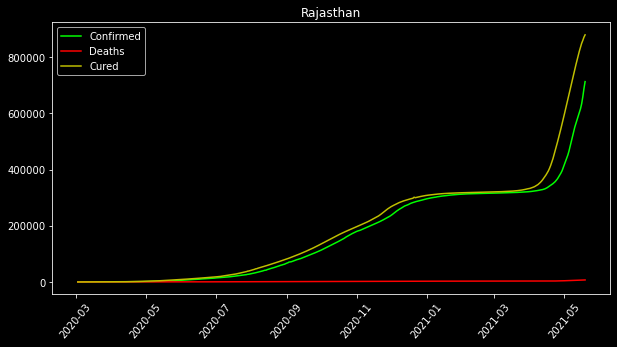

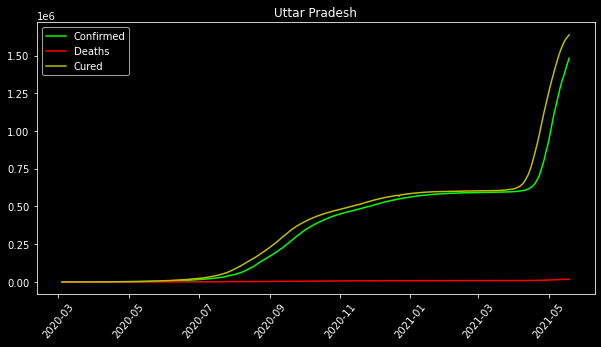

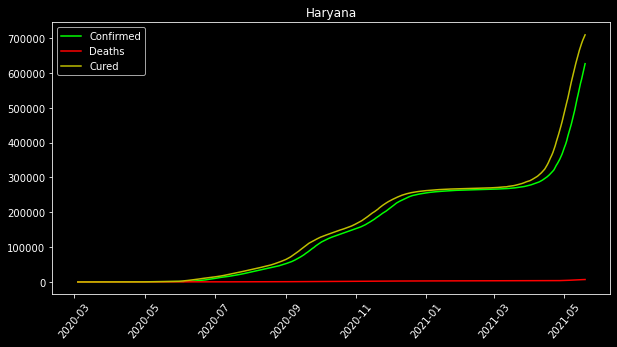

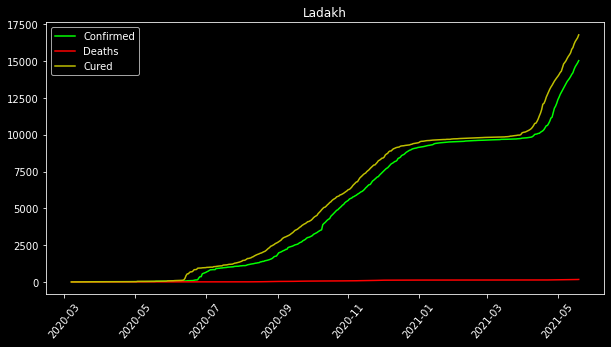

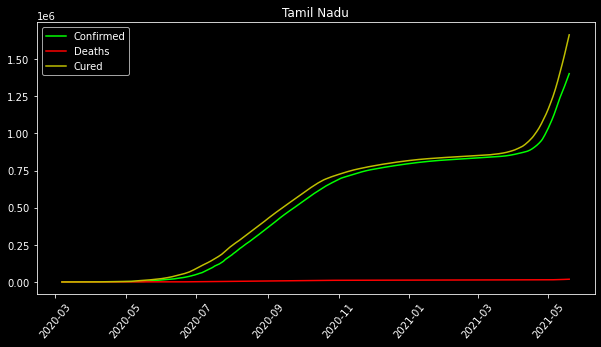

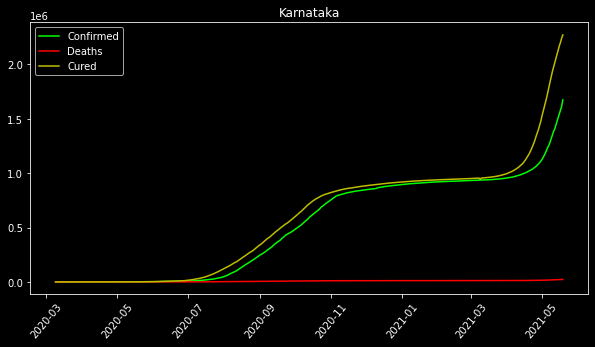

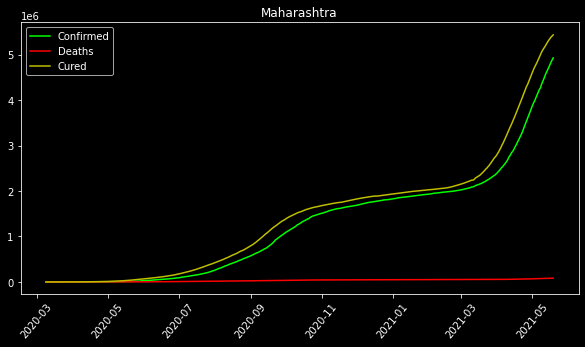

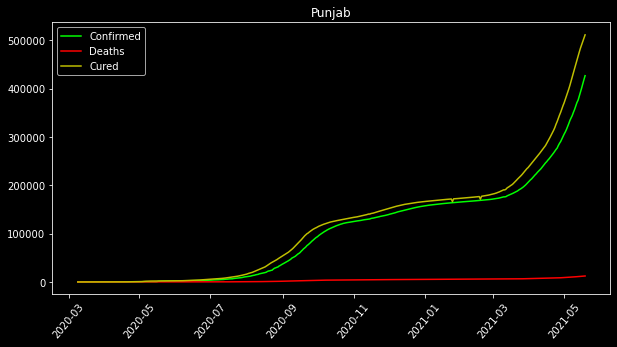

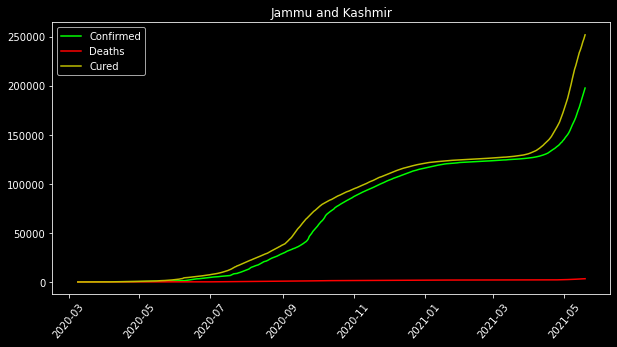

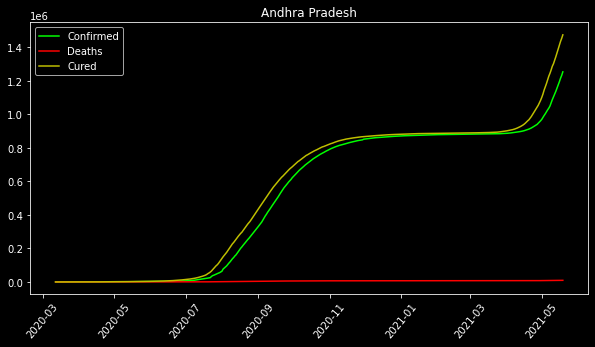

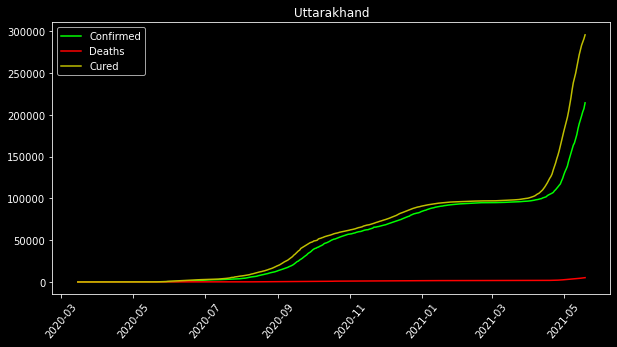

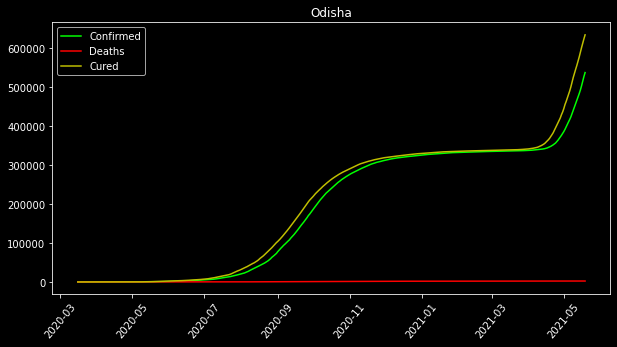

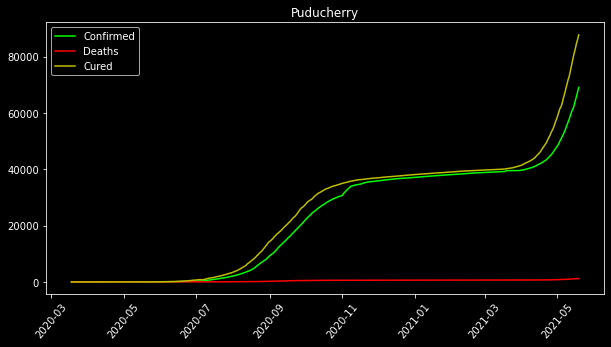

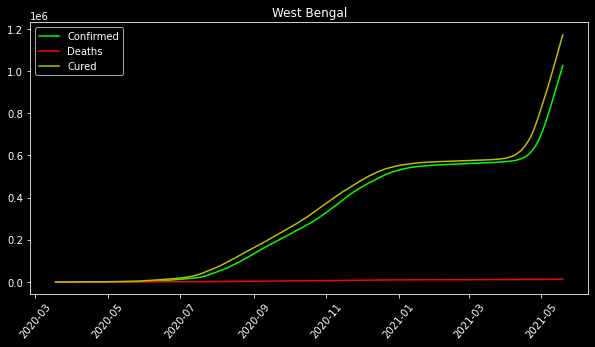

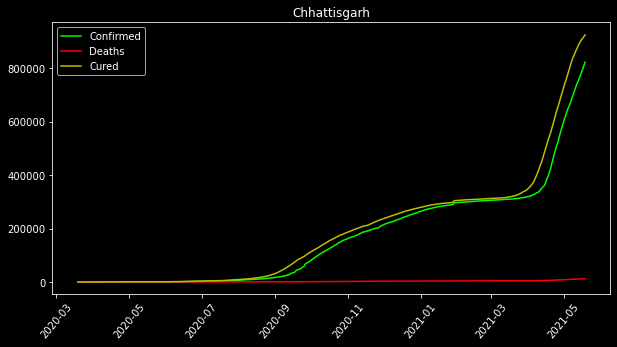

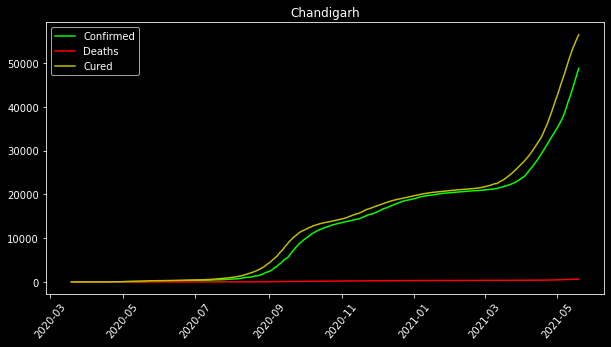

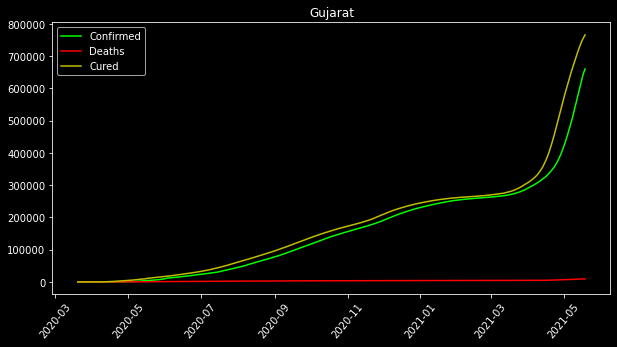

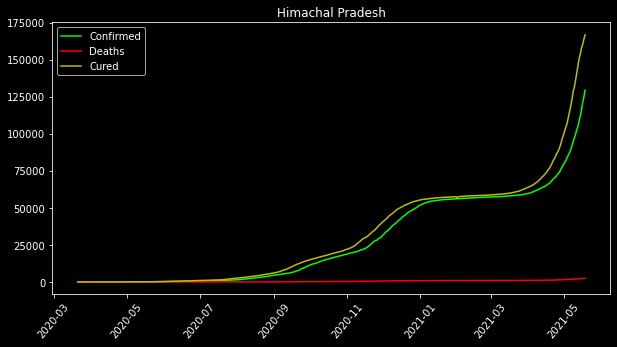

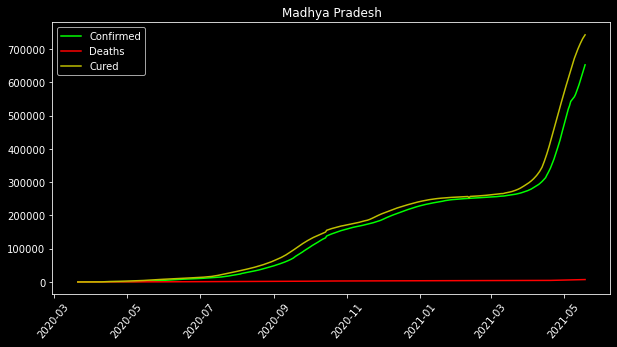

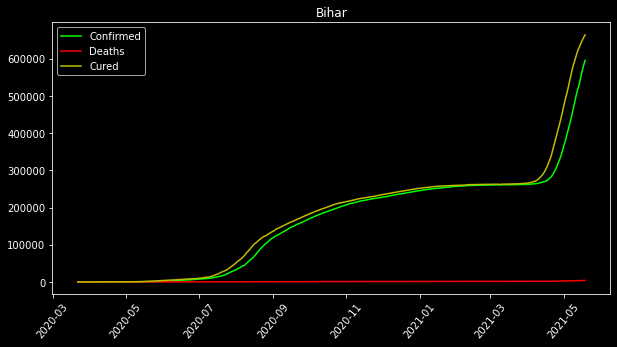

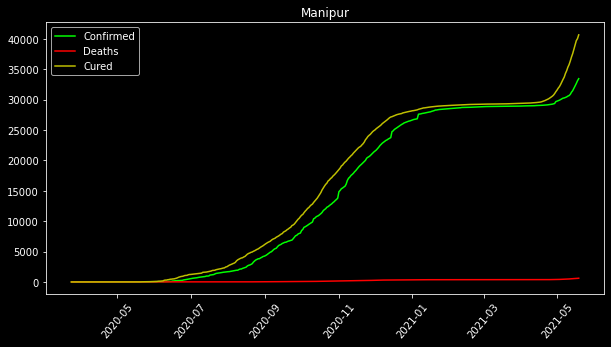

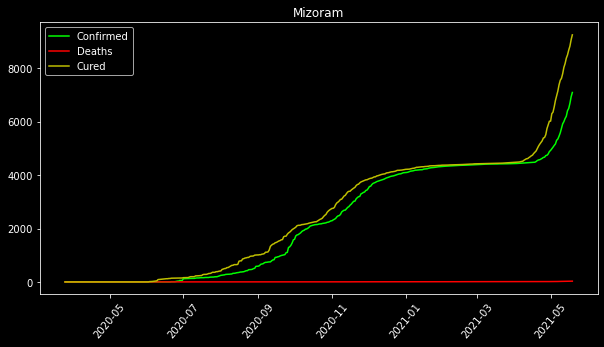

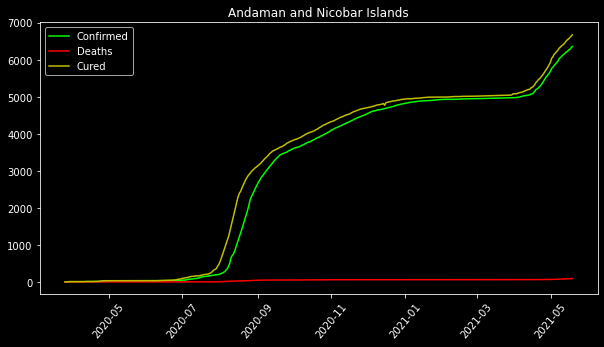

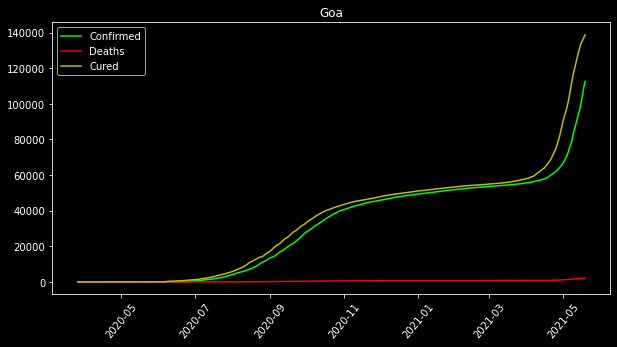

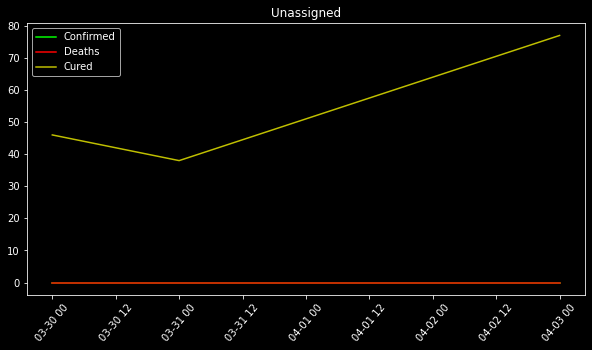

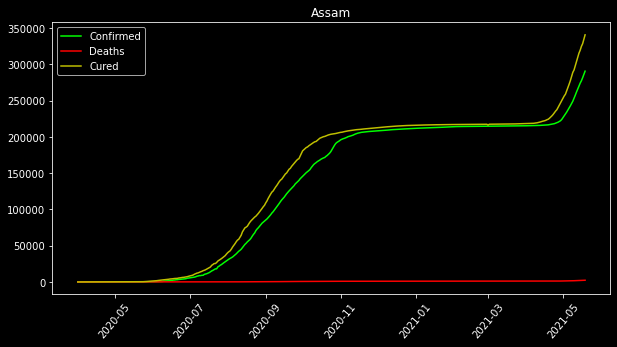

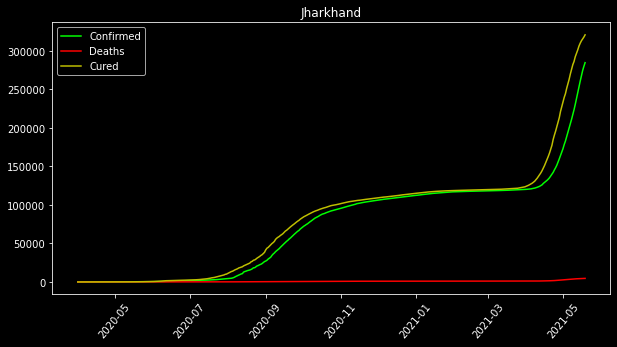

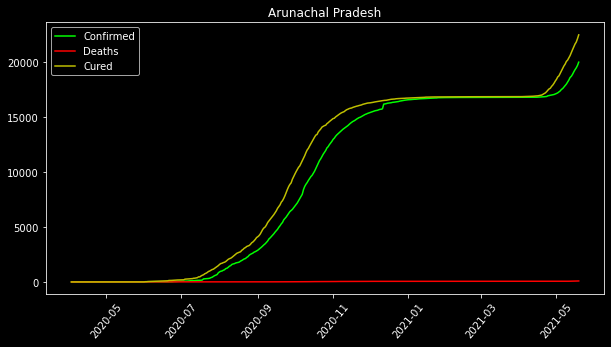

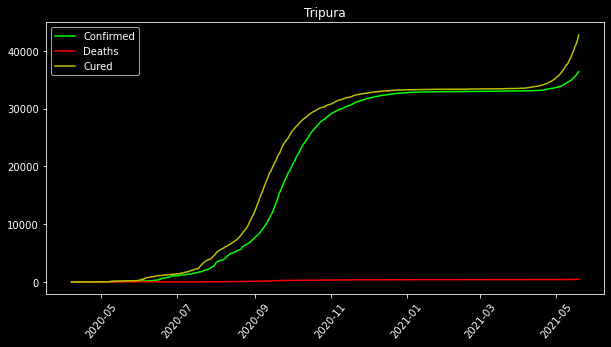

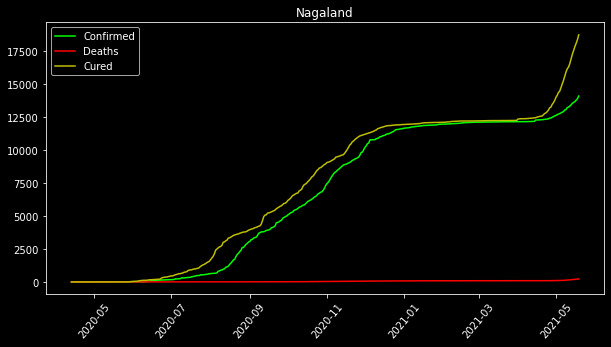

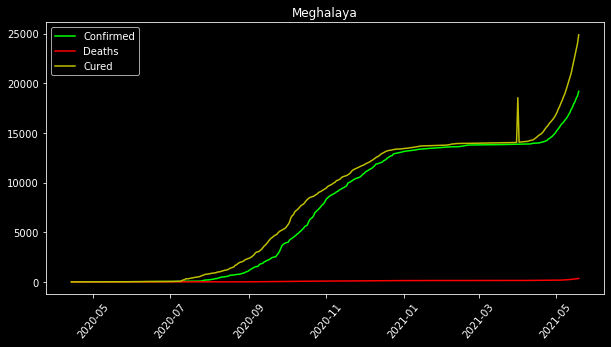

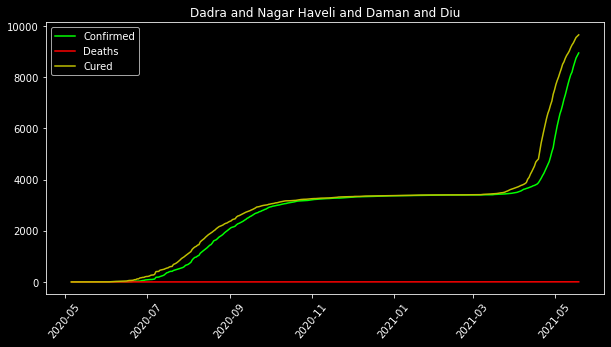

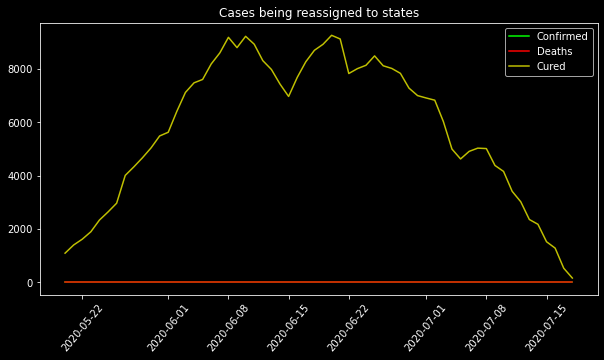

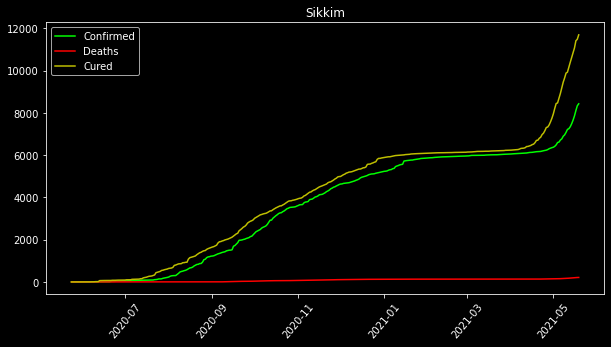

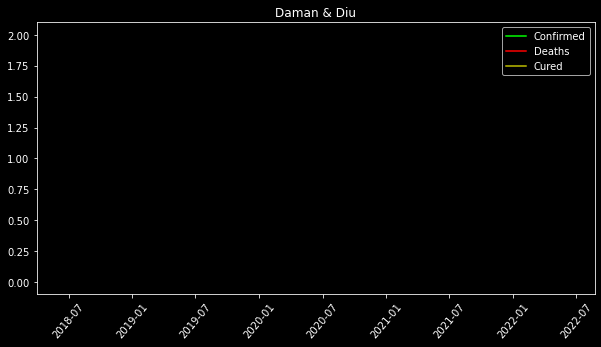

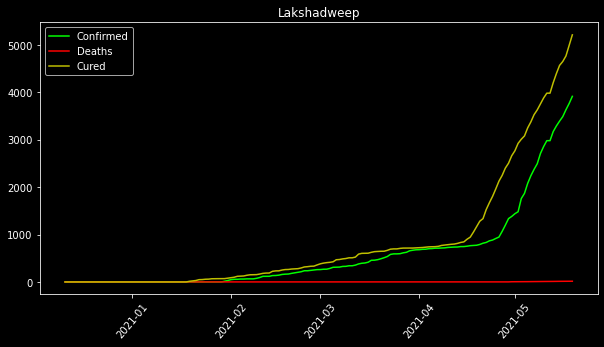

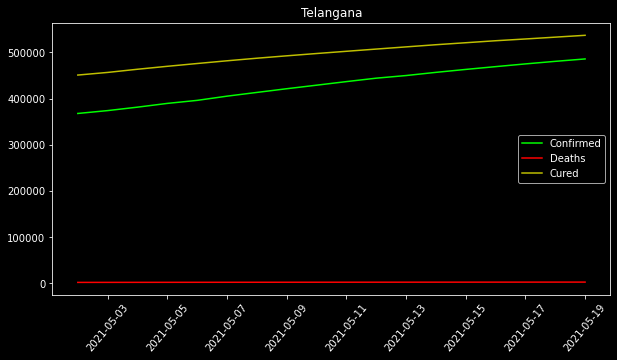

In [29]:
for s in data["State/UnionTerritory"].unique():
    plt.figure(figsize = (10,5))
    l = ["Confirmed","Deaths","Cured"]
    dff = data[data["State/UnionTerritory"]==s]
    plt.plot(dff["Date"],dff["Cured"],color = "lime",linestyle ="-")
    plt.plot(dff["Date"],dff["Deaths"],color = "r",linestyle ="-")
    plt.plot(dff["Date"],dff["Confirmed"],color = "y",linestyle ="-")
    plt.legend(l)
    plt.title("{}".format(s))
    plt.xticks(rotation=50)
    plt.show()

In [30]:
#### Visulizing data by corresponding month

In [31]:
fig = px.bar(data, x = "Year", y = "Confirmed", color = "Month",barmode = "group",height=450,width=800,
            title = "Confirmed Cases In Each month form 2020-01-30 to 2021-05-19")
fig.show()

In [32]:
fig = px.bar(data, x = "Year", y = "Deaths", color = "Month",barmode = "group",height=450,width=800,
            title = "Cured Patients In Each month form 2020-01-30 to 2021-05-19")
fig.show()

In [33]:
fig = px.bar(data, x = "Year", y = "Cured", color = "Month",barmode = "group",height=450,width=800,
            title = "Deaths In Each month form 2020-01-30 to 2021-05-19")
fig.show()

In [34]:
HTML('''<script>initialize();</script>Click <a href="javascript:code_toggle()">here</a> to show/hide codes in this notebook.''')